# The Decision Tree Algorithm

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

## How Does the Decision Tree Algorithm Work?

The basic idea behind any decision tree algorithm is as follows:

    1. Select the best attribute using Attribute Selection Measures (ASM) to split the records.
    2. Make that attribute a decision node and breaks the dataset into smaller subsets.
    3. Start tree building by repeating this process recursively for each child until one of the conditions will match:
        - All the tuples belong to the same attribute value.
        - There are no more remaining attributes.
        - There are no more instances.

## Importing Required Libraries for the decision tree

In [29]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
%matplotlib inline

## Loading the dataset
Loading the required dataset using pandas' read CSV function.

In [30]:
#load dataset
pima = pd.read_csv("./diabetes.csv")

## Visualising the dataset
The datasets consists of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [31]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Selection
Dividing given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [32]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

The variable 'X' contains all the feature variables.

In [33]:
print(X)

     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
0              6        0  33.6   50      148             72   
1              1        0  26.6   31       85             66   
2              8        0  23.3   32      183             64   
3              1       94  28.1   21       89             66   
4              0      168  43.1   33      137             40   
..           ...      ...   ...  ...      ...            ...   
763           10      180  32.9   63      101             76   
764            2        0  36.8   27      122             70   
765            5      112  26.2   30      121             72   
766            1        0  30.1   47      126             60   
767            1        0  30.4   23       93             70   

     DiabetesPedigreeFunction  
0                       0.627  
1                       0.351  
2                       0.672  
3                       0.167  
4                       2.288  
..                        ...  
763    

The variable 'y' contains the target variable for each instance.

In [34]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Splitting the dataset for training and testing
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
Splitting the dataset by using the function train_test_split(). We need to pass three parameters features; target, and test_set size.

In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)# 70% training and 30% test

The following is the training set with feature variables.

In [36]:
print(X_train)

     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
88            15      110  37.1   43      136             70   
467            0      100  36.8   25       97             64   
550            1        0  27.4   21      116             70   
147            2      119  30.5   34      106             64   
481            0        0  35.2   29      123             88   
..           ...      ...   ...  ...      ...            ...   
645            2      440  39.4   30      157             74   
715            7      392  33.9   34      187             50   
72            13        0  43.4   42      126             90   
235            4        0  43.6   26      171             72   
37             9        0  32.9   46      102             76   

     DiabetesPedigreeFunction  
88                      0.153  
467                     0.600  
550                     0.204  
147                     1.400  
481                     0.197  
..                        ...  
645    

The outcomes are as follows:

In [37]:
print(y_train)

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 537, dtype: int64


The following is the testing set.

In [38]:
print(X_test)

     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
285            7      135  26.0   51      136             74   
101            1        0  26.1   22      151             60   
581            6        0  25.0   27      109             60   
352            3        0  34.4   46       61             82   
726            1      180  36.1   25      116             78   
..           ...      ...   ...  ...      ...            ...   
241            4       88  33.1   22       91             70   
599            1      120  23.1   26      109             38   
650            1      100  25.2   23       91             54   
11            10        0  38.0   34      168             74   
214            9      175  34.2   36      112             82   

     DiabetesPedigreeFunction  
285                     0.647  
101                     0.179  
581                     0.206  
352                     0.243  
726                     0.496  
..                        ...  
241    

The outcomes are as follows:

In [39]:
print(y_test)

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: Outcome, Length: 231, dtype: int64


## Model Creation
Creating a decision tree model using scikit-learn.
In Scikit-learn, optimization of decision tree classifier is performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. We can plot a decision tree on the data with max_depth=3. Other than pre-pruning parameters, we can also try other attribute selection measure such as entropy.

## Optimising Model Performance

- criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3.

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Accuracy of the Model
Let's estimate how accurately the classifier or model can predict the type of cultivars.
Accuracy can be computed by comparing actual test set values and predicted values.

In [41]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


## Visualising the Decision Tree
We can use Scikit-learn's export_graphviz function for displaying the tree within a Jupyter notebook.
Here, we've completed the following steps: 
 *   Imported the required libraries.
 *   Created a StringIO object called dot_data to hold the text representation of the decision tree.
 *   Exported the decision tree to the dot format using the export_graphviz function and write the output to the dot_data buffer.
 *   Created a pydotplus graph object from the dot format representation of the decision tree stored in the dot_data buffer.
 *   Written the generated graph to a PNG file named "diabetes.png".
 *   Displayed the generated PNG image of the decision tree using the Image object from the IPython.display module.

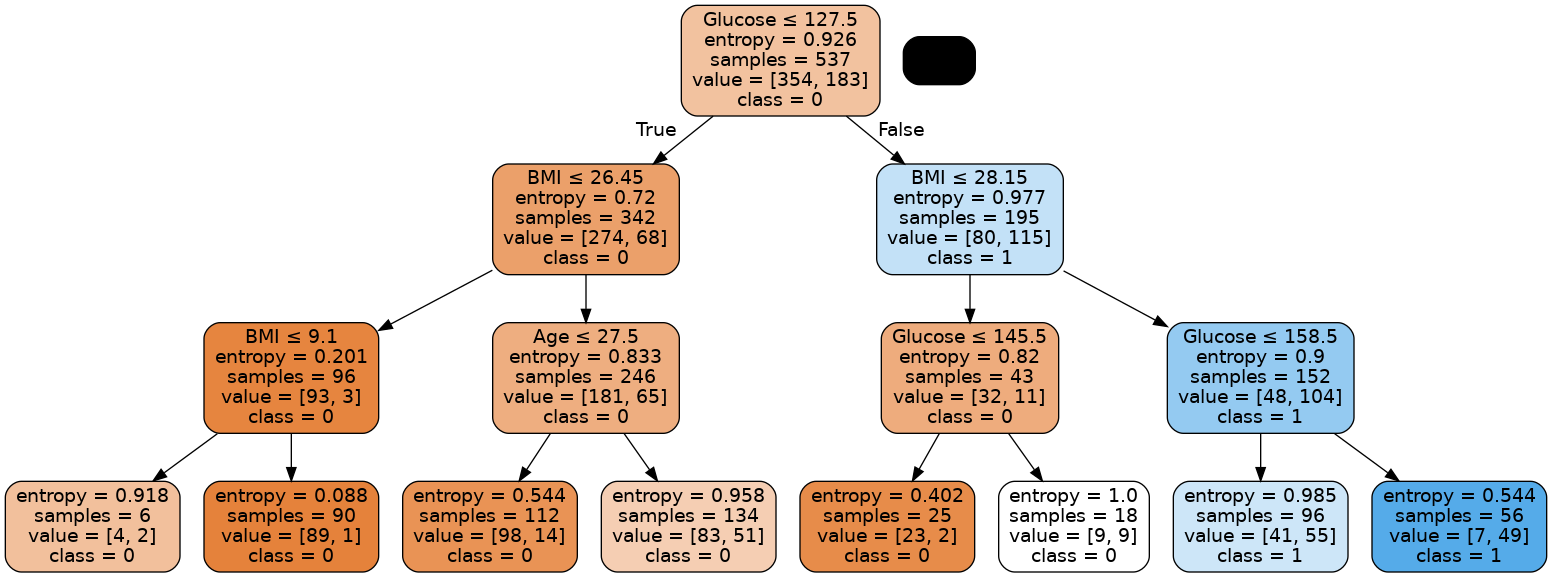

In [42]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Checking the Model Prediction for old and new instances

In [43]:
pima.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Checking a specific instance of the dataset:

In [44]:
new_row = pd.DataFrame({
    "Pregnancies": [5],
    "Insulin": [112],
    "BMI": [26.2],
    "Age": [30],
    "Glucose": [121],
    "BloodPressure": [72],
    "DiabetesPedigreeFunction": [0.245]})
new_pred = clf.predict(new_row)
print(new_pred)

[0]


Creating a new instance using the average values of all the instances.

In [45]:
arr = []
for i in X.columns:
    avg = X[i].mean()
    arr.append(avg)
    print(f"{i} = {avg}")

Pregnancies = 3.8450520833333335
Insulin = 79.79947916666667
BMI = 31.992578124999998
Age = 33.240885416666664
Glucose = 120.89453125
BloodPressure = 69.10546875
DiabetesPedigreeFunction = 0.47187630208333325


Checking the model's prediction for the new instance:

In [46]:
new_row = pd.DataFrame({
    "Pregnancies": [arr[0]],
    "Insulin": [arr[1]],
    "BMI": [arr[2]],
    "Age": [arr[3]],
    "Glucose": [arr[4]],
    "BloodPressure": [arr[5]],
    "DiabetesPedigreeFunction": [arr[6]]})
new_pred = clf.predict(new_row)
print(new_pred)

[0]


Changing the "Glucose" impacts the prediction of the Decision Tree Classifier Model.

In [47]:
new_row["Glucose"] = 130
new_pred = clf.predict(new_row)
print(new_pred)

[1]


## Pros of decision tree classification:
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

## Cons of decision tree classification:
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced - by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

## Conclusion
In conclusion, the decision tree is a simple and powerful machine-learning algorithm that is used for both classification and regression analysis. It works by making decisions based on the values of the features and dividing the data into smaller subgroups until the leaves are pure.